# How Prudential can use the Mortality Data

## Problem statement:
### We have to find how Prudential can use the Mortality rate data set of the different states in USA


In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import pandas as pd
import numpy as np

# import Image
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [2]:
mortality_data = pd.read_csv("../US-insuarance-premium-predictor/Data/mort.csv")

In [3]:
mortality_data.head()

,Location,FIPS,Category,"% Change in Mortality Rate, 1980-201",1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,Premium
0,Alabama,1,Neonatal disorders,-53.82,11.03,8.51,7.52,6.08,6.21,6.32,5.58,5.10,NaN,NaN,NaN
1,Alabama,1,HIV/AIDS and tuberculosis,101.52,1.46,2.15,8.03,14.10,5.47,4.67,3.35,2.94,NaN,NaN,NaN
2,Alabama,1,Musculoskeletal disorders,-1.56,3.26,3.29,3.42,3.67,3.97,3.74,3.27,3.21,NaN,NaN,NaN
3,Alabama,1,"Diabetes, urogenital, blood, and endocrine dis...",22.44,57.83,58.79,61.83,68.46,74.81,76.62,72.34,70.81,NaN,NaN,NaN
4,Alabama,1,Digestive diseases,-22.56,22.13,21.51,20.58,20.16,19.56,18.75,17.42,17.13,NaN,NaN,NaN


In [4]:
for col in ['Location', 'FIPS', 'Category']:
    mortality_data[col] = mortality_data[col].astype('category')
    
mortality_data.head()

,Location,FIPS,Category,"% Change in Mortality Rate, 1980-201",1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,Premium
0,Alabama,1,Neonatal disorders,-53.82,11.03,8.51,7.52,6.08,6.21,6.32,5.58,5.10,NaN,NaN,NaN
1,Alabama,1,HIV/AIDS and tuberculosis,101.52,1.46,2.15,8.03,14.10,5.47,4.67,3.35,2.94,NaN,NaN,NaN
2,Alabama,1,Musculoskeletal disorders,-1.56,3.26,3.29,3.42,3.67,3.97,3.74,3.27,3.21,NaN,NaN,NaN
3,Alabama,1,"Diabetes, urogenital, blood, and endocrine dis...",22.44,57.83,58.79,61.83,68.46,74.81,76.62,72.34,70.81,NaN,NaN,NaN
4,Alabama,1,Digestive diseases,-22.56,22.13,21.51,20.58,20.16,19.56,18.75,17.42,17.13,NaN,NaN,NaN


In [5]:
mortality_data.describe()

,"% Change in Mortality Rate, 1980-201",1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,Premium
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,0.0,0.0,0.0
mean,3.221774,51.768618,49.643473,47.151559,46.727096,44.695472,41.994174,38.807283,38.775752,NaN,NaN,NaN
std,81.130088,110.532541,103.671452,93.359657,89.372294,83.222280,73.990722,66.370208,66.192817,NaN,NaN,NaN
min,-88.420000,0.020000,0.020000,0.010000,0.010000,0.010000,0.030000,0.030000,0.020000,NaN,NaN,NaN
25%,-37.650000,1.980000,2.210000,2.900000,3.280000,3.085000,2.415000,1.680000,1.665000,NaN,NaN,NaN
50%,-12.390000,16.810000,15.890000,15.640000,15.310000,13.960000,14.280000,14.190000,14.010000,NaN,NaN,NaN
75%,18.350000,37.465000,38.490000,38.585000,41.400000,40.885000,37.750000,34.420000,33.555000,NaN,NaN,NaN
max,785.690000,572.810000,539.900000,486.970000,475.260000,448.760000,394.250000,347.030000,347.920000,NaN,NaN,NaN


In [6]:
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 15 columns):
Location                                1071 non-null category
FIPS                                    1071 non-null category
Category                                1071 non-null category
% Change in Mortality Rate, 1980-201    1071 non-null float64
1980                                    1071 non-null float64
1985                                    1071 non-null float64
1990                                    1071 non-null float64
1995                                    1071 non-null float64
2000                                    1071 non-null float64
2005                                    1071 non-null float64
2010                                    1071 non-null float64
2015                                    1071 non-null float64
2020                                    0 non-null float64
2025                                    0 non-null float64
Premium                     

## Predicting the columns

### Finding the Line of Best Fit or Linear Regression Line 

In [7]:
def predict_mortality(years,data,x):
    years = np.reshape(years,(len(years),1)) # converting to matrix of n X 1
    data = np.reshape(data,(len(data),1))
    linear_mod = linear_model.LinearRegression() #defining the linear regression model
    linear_mod.fit(years,data) #fitting the data points in the model
    predicted_mortality =linear_mod.predict(x)
    return predicted_mortality[0][0],linear_mod.coef_[0][0] ,linear_mod.intercept_[0]

### Predicting the column 2020, 2025 and Premium

In [8]:
def pred_row(row):
    data = np.array(list(mortality_data.iloc[row, 4: -3]))
#     data = np.array([11.03, 8.51, 7.52, 6.08, 6.21, 6.32, 5.58, 5.10])
    
    years = np.array([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015])
    
    predicted_mortality, coefficient, constant = predict_mortality(years,data,2020)
    mortality_data.iloc[row, -3] = predicted_mortality
    mortality_data.iloc[row, -2] = coefficient * 2025 + constant
    
    # Criteria for Predicting the premium: 
        # Positive slope (i.e Mortality rate will increase (🡹)): Increase(🡹) the premium
        # Negative slope (i.e Mortality rate will descrease(🡻)): Descrease(🡻) the premium

    if coefficient > 0:
        mortality_data.iloc[row, -1] = "Increase"
    else:
        mortality_data.iloc[row, -1] = "Decrease"

    return

In [9]:
def predict_all():
    for i in range(0, mortality_data.count().Location):
#         print (i)
        pred_row(i)
    return

In [10]:
predict_all()

# Rounding the colummns to two deccimals.
mortality_data = mortality_data.round({'2020': 2, '2025': 2}) 

In [11]:
mortality_data.head()

,Location,FIPS,Category,"% Change in Mortality Rate, 1980-201",1980,1985,1990,1995,2000,2005,2010,2015,2020,2025,Premium
0,Alabama,1,Neonatal disorders,-53.82,11.03,8.51,7.52,6.08,6.21,6.32,5.58,5.10,3.85,3.14,Decrease
1,Alabama,1,HIV/AIDS and tuberculosis,101.52,1.46,2.15,8.03,14.10,5.47,4.67,3.35,2.94,5.15,5.12,Decrease
2,Alabama,1,Musculoskeletal disorders,-1.56,3.26,3.29,3.42,3.67,3.97,3.74,3.27,3.21,3.52,3.53,Increase
3,Alabama,1,"Diabetes, urogenital, blood, and endocrine dis...",22.44,57.83,58.79,61.83,68.46,74.81,76.62,72.34,70.81,78.90,81.39,Increase
4,Alabama,1,Digestive diseases,-22.56,22.13,21.51,20.58,20.16,19.56,18.75,17.42,17.13,16.36,15.63,Decrease


### Save the predicted dataframe as CSV file

In [12]:
mortality_data.to_csv("../US-insuarance-premium-predictor/Data/predicted_mort.csv", encoding='utf-8')

### Plotting the Mortality rates (Past  + Predicted) along with the Line of Best Fit

In [13]:
linear_mod = linear_model.LinearRegression() #defining the linear regression model

def show_plot(row):
    data = np.array(list(mortality_data.iloc[row, 4:-1]))
    years = np.array([1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025])

    years = np.reshape(years,(len(years),1)) # converting to matrix of n X 1
    data = np.reshape(data,(len(data),1))

    plt.scatter(years,data,color='red') #plotting the initial datapoints 

    linear_mod.fit(years,data) #fitting the data points in the model

    plt.plot(years, linear_mod.predict(years),color='blue',linewidth=3) #plotting the line made by linear regression

    plt.xlabel('Years')
    plt.ylabel('Mortality Rate')

    plt.xticks(years)
    
    plt.title(mortality_data.iloc[row, 0] + ": " + 'Morality caused by- ' + mortality_data.iloc[row, 2])
    
    plt.savefig('../US-insuarance-premium-predictor/Images/predicted_mort_plot.jpg', dpi=100)
    
    plt.show()

    return

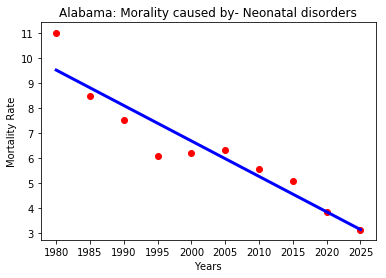

In [14]:
show_plot(0)

* Here we can <font color=blue>*__reduce__*</font> the premium for <font color=blue>*__competitive pricing to attract more consumers.__*</font>

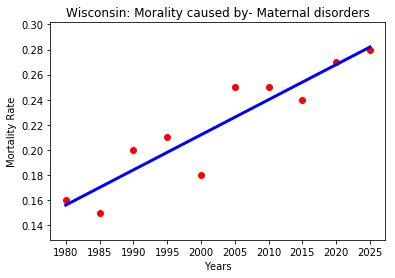

In [15]:
show_plot(1044)

* Here we should <font color=red> *__increase__* </font> the premium to <font color=red> *__reduce the risk.__* </font>

## Future work:
#### Can use better algorithms like ensemble of multi algorithms, Xgboost etc.
#### If current Premium data is provided we can even grt the most optimal premium trends for the future